## Target:

Xaxis: common lens (CTL)

Yaxis: differential lens (DTL)

Zaxis: % difference in arm circulating powers

In [1]:
from pykat import finesse        # import the whole pykat.finesse package
from pykat.commands import *     # import all packages in pykat.commands
import numpy as np               # for basic math/sci/array functions
import matplotlib.pyplot as plt  # for plotting
import inspect                   # for looking at source codes of functions
import pykat.ifo.aligo as aligo

# tell the notebook to automatically show plots inline below each cell
%matplotlib inline               
# use pykat's plotting style. change dpi to change plot sizes on your screen
pykat.init_pykat_plotting(dpi=90)

base = aligo.make_kat()
base.maxtem=4
base = aligo.setup(base,verbose=True)

ULbase = base.deepcopy()
ULbase.removeBlock("locks")

                                              ..-
    PyKat develop         _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat

-- pretuning interferometer to precision 0.001 deg = 2.95556e-12 m
   scanning X arm (maximising power)
   found max/min at: 0 (precision = 0.00030375)
   scanning Y arm (maximising power)
   found max/min at: 0 (precision = 0.00030375)
   scanning MICH (minimising power)
   found max/min at: -0.001 (precision = 0.00010125)
   scanning PRCL (maximising power)
   found max/min at: 0.007 (precision = 0.00030375)
   scanning SRCL (maximising carrier power, then adding 90 deg)
   found max/min at: -90.056 (precision = 0.00030375)
   ... done
-- adjusting PRC length
   adusting kat.lp1.L by -0.0

In [3]:
#probably won't work: 2d locked scan over all ctl and dtl in one finesse run
print(base)

% Generated by PyKat 28.08.2019 17:50:26

%%% FTblock laser
l L0 125.0 0.0 0.0 ni
bs jitter 1.0 0.0 0.0 0.0 ni n0 dump dump
s lmod1 1.0 n0 n1
mod mod1 9099471.0 0.18 1 pm 0.0 n1 n2
s lmod2 1.0 n2 n3
mod mod2 45497355.0 0.18 1 pm 0.0 n3 nLaserOut
%%% FTend laser

%%% FTblock IMC
s sIMCin 0.0 nLaserOut nMC1in
bs1 MC1 0.006 0.0 0.0 44.59 nMC1in nMC1refl nMC1trans nMC1fromMC3
s sMC1_MC2 16.24057 nMC1trans nMC2in
bs1 MC2 0.0 0.0 0.0 0.82 nMC2in nMC2refl nMC2trans dump
attr MC2 Rcx 27.24
attr MC2 Rcy 27.24
s sMC2_MC3 16.24057 nMC2refl nMC3in
bs1 MC3 0.006 0.0 0.0 44.59 nMC3in nMC3refl nMC3trans nMCreturn_refl
s sMC3substrate 0.0845 1.44963098985906 nMC3trans nMC3ARin
bs2 MC3AR 0.0 0.0 0.0 28.9661 nMC3ARin dump nIMCout dump
s sMC3_MC1 0.465 nMC3refl nMC1fromMC3
%%% FTend IMC

%%% FTblock HAM2
s sHAM2in 0.4282 nIMCout nIM11
bs1 IM1 0.0 0.0 0.0 53.0 nIM11 nIM12 dump dump
s sIM1_IM2 1.2938 nIM12 nIM21
bs1 IM2 0.0 0.0 0.0 7.0 nIM21 nIM22 dump dump
attr IM2 Rcx 12.8
attr IM2 Rcy 12.8
s sIM2_FI 0.2

--------------------------------------------------------------
Running kat - Started at 2019-08-28 18:35:36.322784


100% | ETA:  0:00:00 | Calculating - Locked ✓✓✓✓✓ (Locking steps tried 6/10000)))

Used Finesse 2.2 at /Users/annagreen/GIT/Finesse/finesse/kat

Finished in 67.6372 seconds


100% | ETA:  0:00:00 | Calculating - Locked ✓✓✓✓✓ (Locking steps tried 8/10000)

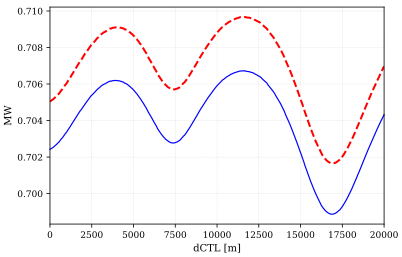

--------------------------------------------------------------
Running kat - Started at 2019-08-28 18:36:44.129673


 86% | ETA:  0:00:27 | Calculating                                             00)

Used Finesse 2.2 at /Users/annagreen/GIT/Finesse/finesse/kat

Finished in 169.374 seconds


100% | ETA:  0:00:00 | Calculating                                             

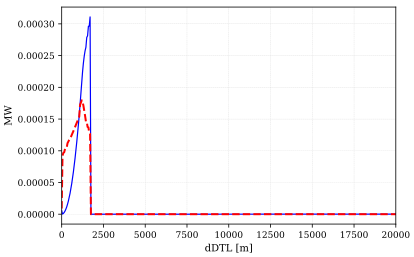

In [20]:
# part 1: CTL scan, get mirror tunings from 1 lock drag
kat = base.deepcopy()
lensrange=20e3 #in m
steps=400#steps in each thermal lensing sweep that will be saved using pickle
uD=1e6#scaling for TL values, use to convert axes to uD

# mirs = [kat.PRM, 
#        kat.ITMX, 
#        kat.ITMY, 
#        kat.ETMX, 
#        kat.ETMY, 
#        kat.SRM]

# ##add lines to record the tunings of each mirror as they are dragged
# for m in mirs:
#     kat.parse("""
#     set _{mirror}_phi {mirror} phi
#     func {mirror}_phi = $_{mirror}_phi 
#     """.format(mirror=m.name))

kat.IFO.POW_X.add_signal()
kat.IFO.POW_Y.add_signal()

#common
OP3 = kat.deepcopy()
OP3.verbose=True
OP3.parse("""
xaxis* ITMY_lens f lin 0 %s %s
put* ITMX_lens f $x1"""%(lensrange,steps))
o=OP3.run()
plt.figure()
plt.plot(o.x,o[kat.IFO.POW_X.name]/1e6,label='X')
plt.plot(o.x,o[kat.IFO.POW_Y.name]/1e6,label='Y',ls='--',lw=2)
plt.ylabel('MW')
plt.xlabel('dCTL [m]')
plt.show()

#differential
OP3 = kat.deepcopy()
OP3.verbose=True
OP3.parse("""
xaxis* ITMY_lens f lin 0 %s %s
put* ITMX_lens f $mx1"""%(lensrange,steps))
o=OP3.run()
plt.figure()
plt.plot(o.x,o[kat.IFO.POW_X.name]/1e6,label='X')
plt.plot(o.x,o[kat.IFO.POW_Y.name]/1e6,label='Y',ls='--',lw=2)
plt.ylabel('MW')
plt.xlabel('dDTL [m]')
plt.show()


# OP4 = kat.deepcopy()
# OP4.parseCommands("""
# xaxis ITMYconstL p lin 0 -%s %s
# put ITMXconstL p $x1"""%(lensrange,steps))


# part 2: DTL for a given CTL: apply found CTL tunings, then lock drag each CTL tuning over DTL range?
##Diff lensing
# OP1 = kat.deepcopy()
# OP2 = kat.deepcopy()
# OP1.parseCommands("""
# xaxis ITMYconstL p lin 0 %s %s
# put ITMXconstL p $mx1"""%(lensrange,steps))
# OP2.parseCommands("""
# xaxis ITMYconstL p lin 0 -%s %s
# put ITMXconstL p $mx1"""%(lensrange,steps))
#part 3: inverse of above if looks really odd/inconsistent, or repeat with asymm cav losses

--------------------------------------------------------------
Running kat - Started at 2019-08-28 18:15:48.969007


 97% | ETA:  0:00:00 | Calculating - Locked ✓✓✓✓✓ (Locking steps tried 0/10000)0)

Used Finesse 2.2 at /Users/annagreen/GIT/Finesse/finesse/kat

Finished in 32.2572 seconds


100% | ETA:  0:00:00 | Calculating - Locked ✓✓✓✓✓ (Locking steps tried 0/10000)

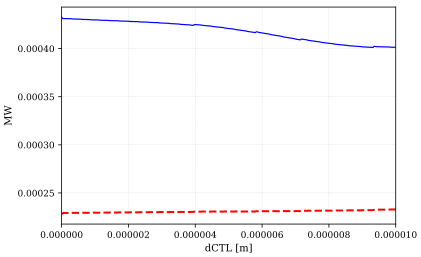

--------------------------------------------------------------
Running kat - Started at 2019-08-28 18:16:21.449864


 96% | ETA:  0:00:02 | Calculating - Locked ✓✓✓✓✓ (Locking steps tried 0/10000)0)

Used Finesse 2.2 at /Users/annagreen/GIT/Finesse/finesse/kat

Finished in 62.7141 seconds


100% | ETA:  0:00:00 | Calculating - Locked ✓✓✓✓✓ (Locking steps tried 0/10000)

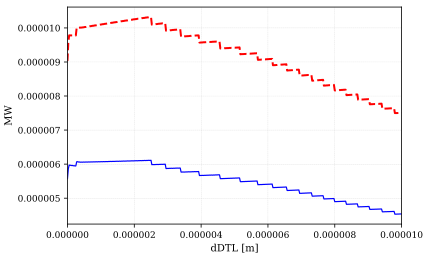

In [14]:
# part 1: CTL scan, get mirror tunings from 1 lock drag
kat = base.deepcopy()
lensrange=10e-6 #Dioptres
steps=400#steps in each thermal lensing sweep that will be saved using pickle
uD=1e6#scaling for TL values, use to convert axes to uD

mirs = [kat.PRM, 
       kat.ITMX, 
       kat.ITMY, 
       kat.ETMX, 
       kat.ETMY, 
       kat.SRM]

##add lines to record the tunings of each mirror as they are dragged
for m in mirs:
    kat.parse("""
    set _{mirror}_phi {mirror} phi
    func {mirror}_phi = $_{mirror}_phi 
    """.format(mirror=m.name))

kat.IFO.POW_X.add_signal()
kat.IFO.POW_Y.add_signal()

lenspowX = 1/float(kat.ITMX_lens.f)
lenspowY = 1/float(kat.ITMY_lens.f)

kat.ITMX_lens.f = np.inf
kat.ITMX_lens.p = lenspowX
kat.ITMY_lens.f = np.inf
kat.ITMY_lens.p = lenspowY

#common
OP3 = kat.deepcopy()
OP3.verbose=True
OP3.parse("""
xaxis* ITMY_lens p lin 0 %s %s
put* ITMX_lens p $x1"""%(lensrange,steps))
o=OP3.run()
plt.figure()
plt.plot(o.x,o[kat.IFO.POW_X.name]/1e6,label='X')
plt.plot(o.x,o[kat.IFO.POW_Y.name]/1e6,label='Y',ls='--',lw=2)
plt.ylabel('MW')
plt.xlabel('dCTL [m]')
plt.show()

#differential
OP3 = kat.deepcopy()
OP3.verbose=True
OP3.parse("""
xaxis* ITMY_lens p lin 0 %s %s
put* ITMX_lens p $mx1"""%(lensrange,steps))
o=OP3.run()
plt.figure()
plt.plot(o.x,o[kat.IFO.POW_X.name]/1e6,label='X')
plt.plot(o.x,o[kat.IFO.POW_Y.name]/1e6,label='Y',ls='--',lw=2)
plt.ylabel('MW')
plt.xlabel('dDTL [m]')
plt.show()


# OP4 = kat.deepcopy()
# OP4.parseCommands("""
# xaxis ITMYconstL p lin 0 -%s %s
# put ITMXconstL p $x1"""%(lensrange,steps))


# part 2: DTL for a given CTL: apply found CTL tunings, then lock drag each CTL tuning over DTL range?
##Diff lensing
# OP1 = kat.deepcopy()
# OP2 = kat.deepcopy()
# OP1.parseCommands("""
# xaxis ITMYconstL p lin 0 %s %s
# put ITMXconstL p $mx1"""%(lensrange,steps))
# OP2.parseCommands("""
# xaxis ITMYconstL p lin 0 -%s %s
# put ITMXconstL p $mx1"""%(lensrange,steps))
#part 3: inverse of above if looks really odd/inconsistent, or repeat with asymm cav losses

using RoCs

In [18]:
# part 1: CTL scan, get mirror tunings from 1 lock drag
kat = base.deepcopy()
Rrange = 10 #m
steps=400#steps in each thermal lensing sweep that will be saved using pickle
uD=1e6#scaling for TL values, use to convert axes to uD

# mirs = [kat.PRM, 
#        kat.ITMX, 
#        kat.ITMY, 
#        kat.ETMX, 
#        kat.ETMY, 
#        kat.SRM]

# ##add lines to record the tunings of each mirror as they are dragged
# for m in mirs:
#     kat.parse("""
#     set _{mirror}_phi {mirror} phi
#     func {mirror}_phi = $_{mirror}_phi 
#     """.format(mirror=m.name))

kat.IFO.POW_X.add_signal()
kat.IFO.POW_Y.add_signal()

lenspowX = 1/float(kat.ITMX_lens.f)
lenspowY = 1/float(kat.ITMY_lens.f)

kat.ITMX_lens.f = np.inf
kat.ITMX_lens.p = lenspowX
kat.ITMY_lens.f = np.inf
kat.ITMY_lens.p = lenspowY

#common
OP3 = kat.deepcopy()
OP3.verbose=True
OP3.parse("""
xaxis* ETMX Rcx lin 0 %s %s
put* ETMX Rcy $x1
put* ETMY Rcx $x1
put* ETMY Rcy $x1"""%(Rrange,steps))
o=OP3.run()
plt.figure()
plt.plot(o.x,o[kat.IFO.POW_X.name]/1e6,label='X')
plt.plot(o.x,o[kat.IFO.POW_Y.name]/1e6,label='Y',ls='--',lw=2)
plt.ylabel('MW')
plt.xlabel('dCRoC [m]')
plt.show()

#differential
OP3 = kat.deepcopy()
OP3.verbose=True
OP3.parse("""
xaxis* ETMX Rcx lin 0 %s %s
put* ETMX Rcy $x1
put* ETMY Rcx $mx1
put* ETMY Rcy $mx1"""%(Rrange,steps))
o=OP3.run()
plt.figure()
plt.plot(o.x,o[kat.IFO.POW_X.name]/1e6,label='X')
plt.plot(o.x,o[kat.IFO.POW_Y.name]/1e6,label='Y',ls='--',lw=2)
plt.ylabel('MW')
plt.xlabel('dDRoC [m]')
plt.show()


# OP4 = kat.deepcopy()
# OP4.parseCommands("""
# xaxis ITMYconstL p lin 0 -%s %s
# put ITMXconstL p $x1"""%(lensrange,steps))


# part 2: DTL for a given CTL: apply found CTL tunings, then lock drag each CTL tuning over DTL range?
##Diff lensing
# OP1 = kat.deepcopy()
# OP2 = kat.deepcopy()
# OP1.parseCommands("""
# xaxis ITMYconstL p lin 0 %s %s
# put ITMXconstL p $mx1"""%(lensrange,steps))
# OP2.parseCommands("""
# xaxis ITMYconstL p lin 0 -%s %s
# put ITMXconstL p $mx1"""%(lensrange,steps))
#part 3: inverse of above if looks really odd/inconsistent, or repeat with asymm cav losses

--------------------------------------------------------------
Running kat - Started at 2019-08-28 18:25:56.716739


  1% | ETA:  11:44:30 | Calculating - Locked XXXXX (Locking steps tried 7806/10000)


Keyboard interrupt caught, stopped simulation.


Finished in 427.949 seconds


AttributeError: 'NoneType' object has no attribute 'x'

<Figure size 432x288 with 0 Axes>